# Pasta Shape Recognizer
The goal of this project is to classify 20 different types of pasta shapes. The types are following:

1. Spaghetti
2. Fettuccine
3. Penne
4. Rigatoni
5. Fusilli
6. Farfalle
7. Linguine
8. Tagliatelle
9. Lasagna
10. Ravioli
11. Tortellini
12. Orecchiette
13. Conchiglie
14. Rotini
15. Bucatini
16. Cannelloni
17. Macaroni
18. Orzo
19. Cavatappi
20. Gemelli

## Setting Up Necessary Things

In [19]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

## Pasta Shape Labels

In [21]:
pasta_shape_labels = [
    "spaghetti",
    "fettuccine",
    "penne",
    "rigatoni",
    "fusilli",
    "farfalle",
    "linguine",
    "tagliatelle",
    "lasagna",
    "ravioli",
    "tortellini",
    "orecchiette",
    "conchiglie",
    "rotini",
    "bucatini",
    "cannelloni",
    "macaroni",
    "orzo",
    "cavatappi",
    "gemelli"
]
len(pasta_shape_labels)

20

## Download all the Pasta Shape images into "data" directory
- Set the `data_path` variable to the relative path of the "data" directory.
- Check if the "data" directory exists. If it doesn't, the create it using `os.mkdir()`.
- Iterate over each pasta shape label in the `pasta_shape_labels` list.
- For each pasta shape, create a subdirectory inside the "data" directory with the name of the pasta shape.
- Search for image URLs related to the current pasta shape using the `search_images_ddg()` function from the **Fastai** library.
- Download the images from the obtained URLs using the `download_images()` function and save them in the corresponding pasta shape subdirectory.
- If an exception occurs during the image download process, it prints an error message and continues with the next pasta shape.

In [22]:
data_path = "../data"  # Relative path to the "data" directory
if not os.path.exists(data_path):
    os.mkdir(data_path)

for pasta_shape in pasta_shape_labels:
    dest = f"{data_path}/{pasta_shape}"
    if not os.path.exists(dest):
        os.mkdir(dest)

    try:
        pasta_shape_image_urls = search_images_ddg(pasta_shape + " pasta")
        download_images(dest, urls=pasta_shape_image_urls)
    except Exception as e:
        print(f"Error downloading images for {pasta_shape}: {str(e)}")
        continue

In [23]:
image_counts = get_image_files(data_path)
image_counts

(#3747) [Path('../data/bucatini/00568ea9-8287-4826-b506-60c40af9a6a4.jpg'),Path('../data/bucatini/0087f25e-fa43-4564-83d3-6e3d141d85f6.jpg'),Path('../data/bucatini/00ef7ec7-4b7e-473f-a3d3-730735240500.jpg'),Path('../data/bucatini/012691c2-3ac2-4928-bc34-e5d4a3f5d0ba.jpg'),Path('../data/bucatini/02dab20f-27d1-4dd8-97e9-1691abd834bc.jpg'),Path('../data/bucatini/0339f0dc-8ca5-4972-b018-5873044f78b3.jpeg'),Path('../data/bucatini/03d607a9-5c84-4e94-a516-7c0b64b911ce.png'),Path('../data/bucatini/0556da94-91b9-446c-8f55-0131f36c0196.jpg'),Path('../data/bucatini/05fce8f7-12f8-4569-acaa-41cdcd594bda.jpg'),Path('../data/bucatini/084debac-cd77-48ad-ba7f-02f2a4318fd8.jpg')...]

In [24]:
failed = verify_images(image_counts)
failed

(#123) [Path('../data/bucatini/309f2975-d703-44c3-8119-ac5f45c29d84.jpg'),Path('../data/bucatini/733b257b-64a2-41aa-87de-846da0ea9c61.jpg'),Path('../data/bucatini/a8da8fde-fc35-4c67-8ba7-07fa4c178ef5.jpg'),Path('../data/bucatini/dc1e375e-fccd-4b0b-b7e6-306954cf6c63.jpg'),Path('../data/bucatini/df3d9916-62df-4e8b-a0a2-3d6d115d6174.jpg'),Path('../data/bucatini/f1dc66f5-7a50-4d68-9fa9-cc9e5b686f72.jpg'),Path('../data/cannelloni/0f939e15-f01c-4076-aec8-2148579d520c.jpg'),Path('../data/cannelloni/2a313e16-b32f-43e9-9fab-cfaf2de62f29.jpg'),Path('../data/cannelloni/557306f0-62fb-40f8-98fd-d0be034f554b.jpg'),Path('../data/cannelloni/567cb68b-675b-4c25-8ec3-078cd4e30caf.jpg')...]

In [25]:
failed.map(Path.unlink)

(#123) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders
Set up a `DataBlock` that defines how to load, split, and preprocess the image data for training a machine learning model. It specifies that the data consists of images and their corresponding labels, splits the data into training and validation sets, and resizes the images to a fixed size.
- `blocks=(ImageBlock, CategoryBlock)`: Specifies that the data consists of images (handled by `ImageBlock`) and corresponding categories or labels (handled by `CategoryBlock`).

- `get_items=get_image_files`: Specifies the function to retrieve the list of image files. `get_image_files` is a built-in function in **Fastai** that recursively retrieves all image files in a given path.

- `splitter=RandomSplitter(valid_pct=0.1, seed=42)`: Defines the splitting strategy for the dataset. In this case, it uses `RandomSplitter` to randomly split the data into training and validation sets, with 10% of the data used for validation. The `seed` parameter ensures reproducibility of the split.

- `get_y=parent_label`: Specifies the function to extract the labels for each image. `parent_label` is a built-in function in **Fastai** that takes the parent folder name as the label for each image.

- `item_tfms=Resize(128)`: Applies image transformations to each item (image) in the dataset. Here, it resizes all images to a fixed size of 128x128 pixels to ensure consistent input shape for the model.

In [26]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [27]:
bs = 8 # batch size
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

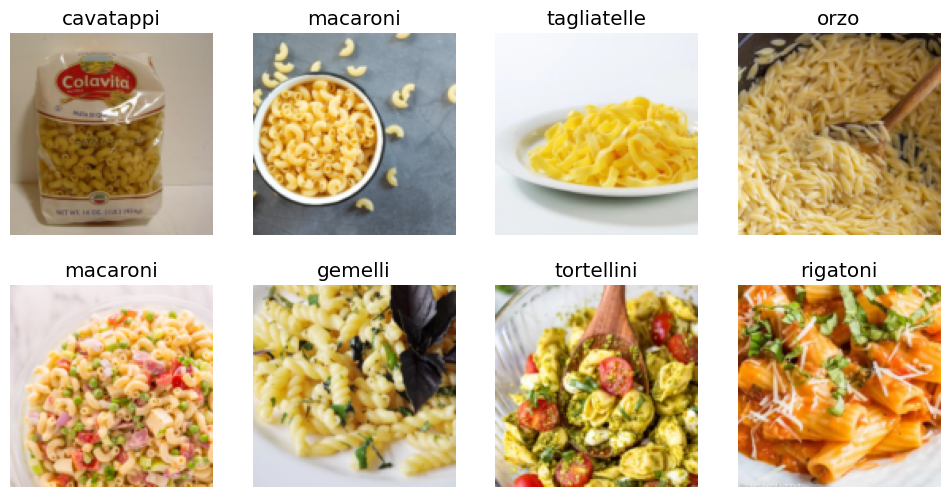

In [30]:
dls.train.show_batch(max_n=8, nrows=2)

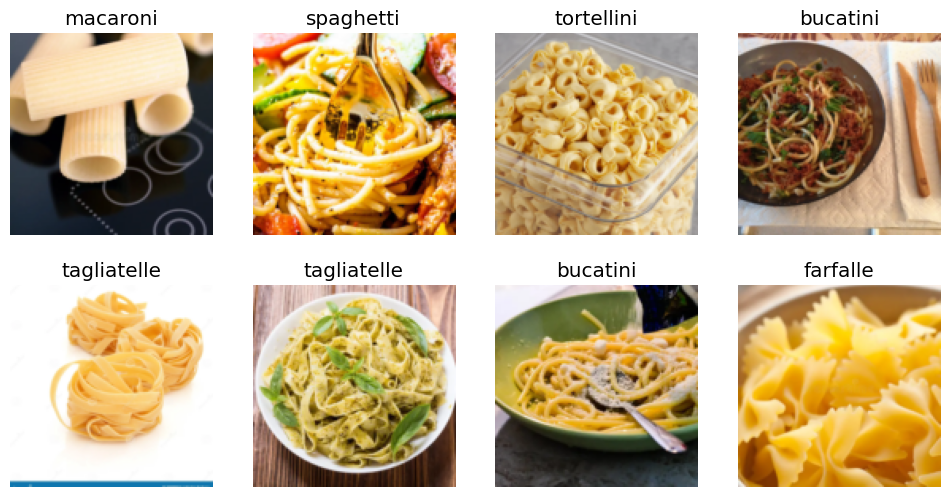

In [32]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

e:\Data Science\Pasta-Shape-Recognizer\venv\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


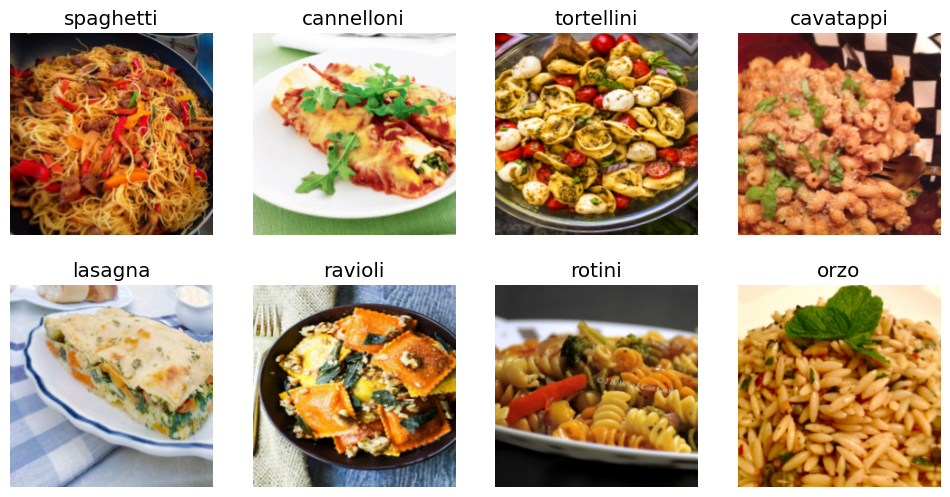

In [33]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

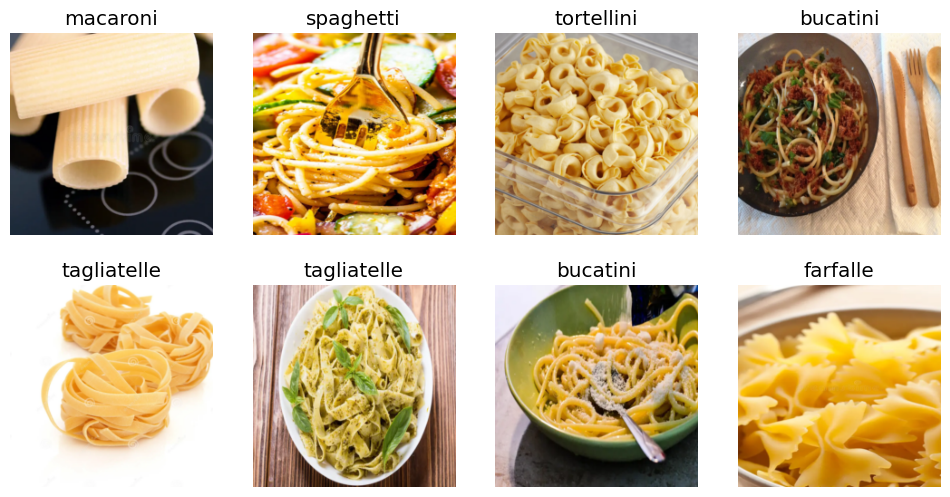

In [34]:
dls.valid.show_batch(max_n=8, nrows=2)